# **El método de la transformada inversa**

Suponga que queremos generar el valor de una variable aleatoria discreta $X$ con función de masa de probabilidad

$$P\{X=x_j\}=p_j,\: j=0,1,...,\sum_{j}p_j=1$$

Para esto, generamos un número aleatorio $U$; es decir, $U$ está distribuido uniformemente entre $(0,1)$, y sea

$$ 
X=\left\{\begin{matrix}
x_0 & si & U < p_0\\ 
x_1 & si & p_0 \leq U < p_0 + p_1\\ 
\vdots  &  &  \\ 
x_j & si & \sum_{i=1}^{j-1} p_i \leq U < \sum_{i=1}^{j} p_i\\ 
\vdots  &  & 
\end{matrix}\right.
$$

Como $P\{ a \leq U < b\}=b-a$ para $0<a<b<1$, tenemos que
$$P\{X=xj\}=P\{\sum_{i=1}^{j-1}p_i \leq U < \sum_{i=1}^{j}p_i \}=p_j$$
y entonces $X$ tiene la distribución deseada.

In [2]:
import numpy as np

def genvardiscret(U,X,P):
    V = []
    for t in range(0, len(U)):
        for t2 in range(0, len(X)):
            if U[t]<P[t2]:
                V.append(X[t2])
                break
    return V

**Ejemplo**
Partiendo de la variable aleatoria obtenida de la suma de dos 
dados de seis caras como se muestra en la siguiente imagen:

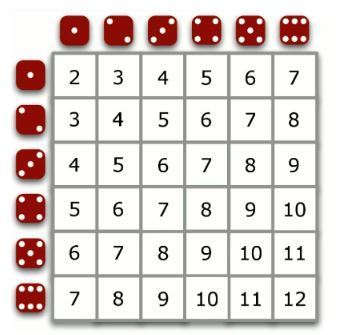

se obtiene que los valores que puede tomar la variable aleatoria (v.a.) $X$ son: $2,3,4,5,6,7,8,9,10,11,12$

por tanto la distribución de probabilidad y las respectivas posibilidades o combinaciones de los dos dados para cada valor de la v.a. son:




|                        |P o s i b i l i d a d e s  -   C o m b i n a c i o n e s             | 
|----------------------- |---------------------------------------| 
| $p(X=2)=\frac{1}{36}$  | $(1,1)$                               |
| $p(X=3)=\frac{2}{36}$  | $(1,2),(2,1)$                         |
| $p(X=4)=\frac{3}{36}$  | $(1,3),(3,1),(2,2)$                   |
| $p(X=5)=\frac{4}{36}$  | $(1,4),(4,1),(2,3),(3,2)$             |
| $p(X=6)=\frac{5}{36}$  | $(1,5),(5,1),(2,4),(4,2),(3,3)$       |
| $p(X=7)=\frac{6}{36}$  | $(1,6),(6,1),(2,5),(5,2),(3,4),(4,3)$ |
| $p(X=8)=\frac{5}{36}$  | $(2,6),(6,2),(3,5),(5,3),(4,4)$       |
| $p(X=9)=\frac{4}{36}$  | $(3,6),(6,3),(4,5),(5,4)$             |
| $p(X=10)=\frac{3}{36}$ | $(4,6),(6,4),(5,5)$                   |
| $p(X=11)=\frac{2}{36}$ | $(5,6),(6,5)$                         |
| $p(X=12)=\frac{1}{36}$ | $(6,6)$                               |


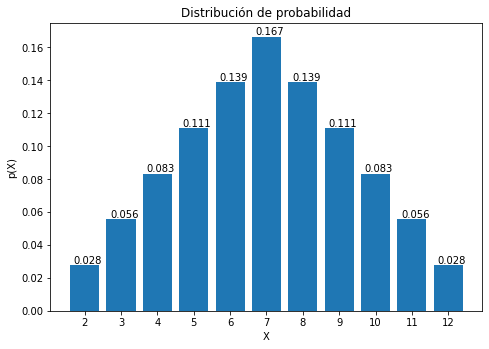

In [3]:
import matplotlib.pyplot as plt

# Usando la distribución de probabilidad discreta de la suma de dos dados
X = [2,3,4,5,6,7,8,9,10,11,12]
p = [1/36,2/36,3/36,4/36,5/36,6/36,5/36,4/36,3/36,2/36,1/36]

fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.bar(X,p)
ax.set_ylabel('p(X)')
ax.set_xlabel('X')

plt.title('Distribución de probabilidad')
plt.xticks(X)
for i in range(len(X)):
  plt.text(x = X[i]-0.3 , y = p[i]+.001, s = round(p[i],3), size = 10)
plt.show()

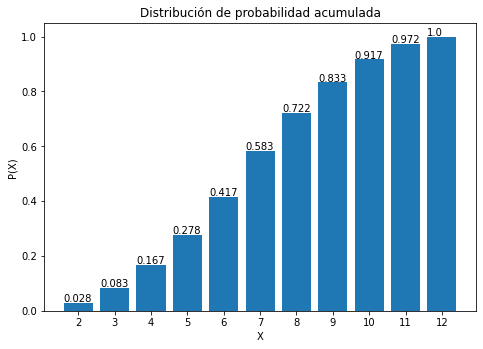

In [4]:
P = np.cumsum(p) # Distribución acumulada de la distribución de probabilidad p

fig = plt.figure()
ax = fig.add_axes([1,1,1,1])
ax.bar(X,P)
ax.set_ylabel('P(X)')
ax.set_xlabel('X')

plt.title('Distribución de probabilidad acumulada')
plt.xticks(X)
for i in range(len(X)):
  plt.text(x = X[i]-0.4 , y = P[i]+.004, s = round(P[i],3), size = 10)

plt.show()

De esta forma, usando el método de la transformada inversa presentado previamente, podemos generar valores de cualquier variable aleatoria discreta $X$ a partir de la distribución de probabilidad discreta $p(X)$, usando la distribución de probabilidad acumulada $P(X)$ y los números pseudoaleatorios $U(0,1)$ generados por un buen generador de números pseudoaleatorios (e.g. generador congruencial mixto).

Por ejemplo, si generamos 10 valores pseudoaletorios con un generador congruencial mixto que garantice aleatoriedad y uniformidad, podemos asumir que son valores $U_i$ para $i=1, 2, 3,..., 10$, que son i.i.d. de una distribución aleatoria uniforme continua en el intervalo de cero a uno, i.e. $U(0,1)$.

Por lo tanto, una posible secuencia de 10 valores sería:
$$U_i = [0.1573, 0.9454, 0.8211, 0.6996, 0.0318, 0.1708, 0.6865, 0.9102, 0.2579, 0.6344]$$

y al aplicar el método de la transformada inversa descrito previamente usando la distribución de probabilidad discreta de la suma de dos dados de seis lados $X$ y $p(X)$, podemos generar variables aleatorias discretas que 'simulan' la variable aleatoria $X_i$ del fenomeno de lanzar dos dados de seis lados y sumar sus caras superiores.

$$X = [2,3,4,5,6,7,8,9,10,11,12]$$
$$p(X) = [1/36,2/36,3/36,4/36,5/36,6/36,5/36,4/36,3/36,2/36,1/36]$$

In [7]:
#U = [0.1573, 0.9454, 0.8211, 0.6996, 0.0318, 0.1708, 0.6865, 0.9102, 0.2579, 0.6344]
U = [0.3109, 0.4065, 0.8235, 0.4223, 0.5107, 0.8390, 0.6695, 0.5873, 0.9955, 0.0848]
V=genvardiscret(U,X,P)

Los valores aleatorios generados de la variable aleatoria discreta de la suma de las caras de dos dados de seis caras $X_i$ a partir de cada uno de los valores de $U_i$:

In [ ]:
print('X_i = '+str(V))

Ahora, si generamos más valores aleatorios y comparamos con la distribución de probabilidad discreta original, podemos notar que a mayor variables aleatorias generadas, se aproximará cada vez más a la distribución teórica.

Para ello definimos un generador congruencial tanto para un valor como para $N$ valores.

In [ ]:
def genran(a,b,m,xant):
    xsig = (a*xant + b) % m
    usig = xsig / m
    return [xsig,usig]

def genranN(a,b,m,x0,N):
    xant = x0
    I=[]
    X=[]
    U=[]
    for t in range(1, N+1):
        [xi,ui] = genran(a,b,m,xant)
        I.append(t)
        X.append(xi)
        U.append(ui)
        xant = xi
    return [I,X,U]

def showValues(I,X,U):
    print("i\tXi\t\tUi")
    for t in range(0, len(X)):
        print("%d\t%d\t%2.4f" % (I[t],X[t],U[t]), sep=' ', end='\n')

Establecemos los parámetros del generador congruencial mixto para $N$ valores y generamos $N$ números pseudoaleatorios $U_i$ de una distribución continua $U(0,1)$

In [ ]:
N = 100

a = 65539.0
b = 0.0
m = (2**31)
x0 = 1791.0

[Ii,Xi,Ui] = genranN(a,b,m,x0,N)

#showValues(Ii,Xi,Ui)

Ahora usando el método de la transformada inversa, generamos las variables aleatorias $X$ a partir de la distribución de probabilidad discreta $p(X)$ y la secuencia de $N$ valores $U_i$

In [ ]:
V=genvardiscret(Ui,X,P)
#print(V)

Podemos visualizar la distribución de frecuencias de los $N$ valores $X_i$ para cada uno de los valores de la variable aleatoria $X$ de la distribución de probabilidad discreta $p(X)$.

In [ ]:
plt.hist(V, bins = len(X))
plt.xticks(X)
plt.title('Frecuencia (F)')
plt.show()
F, bin_edges = np.histogram(V, bins=11)
print('F = ' + str(F))
print('X = '+ str(list(range(2,13))))

Comparamos la distribución de probabilidad teórica $p(X)$ definida previamente para cada uno de los valores de la variable aleatoria $X$, con la distribución de probabilidad empírica $(F/N)$ de los datos simulados de la generación de variables aleatorias discretas $X_i$

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar((np.array(X))-.25,p, width = 0.5)
ax.bar((np.array(X))+.25,F/sum(F), width = 0.5)
ax.set_ylabel('p(X)')
ax.set_xlabel('X')
ax.legend(labels=['Teórica', 'Empirica'])
plt.title('Distribución de probabilidad')
plt.xticks(X)

# **Generación de una v.a. Poisson**

La distribución de Poisson es una distribución de probabilidad discreta que expresa, a partir de una frecuencia de ocurrencia media, la probabilidad de que ocurra un determinado número de eventos durante cierto período de tiempo. Concretamente, se especializa en la probabilidad de ocurrencia de sucesos con probabilidades muy pequeñas, o sucesos "raros".

Una variable aleatorioa discreta $X$ se dice que tiene una distribución de Poisson con parámetro $\lambda > 0$, si, para $k = 0, 1, 2, ...,$ la función de masa de probabilidad de $X$ esta dada por:

$$ f(k;\lambda )= \Pr(X = k)= \frac{\lambda^k e^{-\lambda}}{k!}, $$

donde

$e$ es el número de Euler ($e = 2.71828...$)

$k!$ es el factorial de $k$.


Por ejemplo, la distribución de Poisson para diferentes valores de $\lambda$ se puede ver en la siguiente imagen

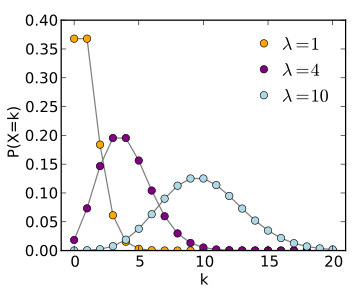

Fuente: https://en.wikipedia.org/wiki/File:Poisson_pmf.svg

y las correspondientes distribuciones de probabilidad acumulada en la siguiente imagen

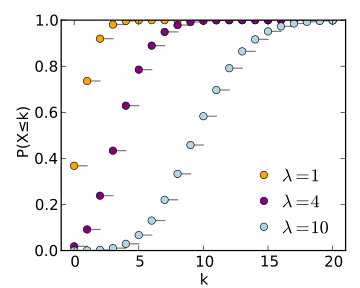

Fuente: https://en.wikipedia.org/wiki/File:Poisson_cdf.svg

Al aprovechar esta recursión para calcular las probabilidades Poisson conforme se necesiten, el algoritmo de la transformada inversa para generar una variable aleatoria Poisson con media 𝛌 se puede expresar como sigue:



> PASO 1: Generar un número aleatorio U.<br>
> PASO 2: $i=0$, $p = e^{-\lambda}$, $F=p$.<br>
> PASO 3: Si $U<F$, hacer $X=i$ y terminar.<br>
> PASO 4: $p=\lambda p / (i+1)$, $F=F+p$, $i=i+1$.<br>
> PASO 5: Ir al paso 3.

In [ ]:
def genpoisson(U,L):
    i=0
    px=np.exp(-L)
    Fx=px

    while True:
      if U < Fx:
        Xi = i
        return Xi
        break
      px = (L*px)/(i+1)
      Fx = Fx + px
      i = i + 1

def genpoissonN(Ui,L,N):
  X=[]
  for i in range(0,len(Ui)):
      xi = genpoisson(Ui[i],L)
      X.append(xi)
  return X

In [ ]:
N = 1000

L = 3
x0 = 3197.0

[IIi,XXi,Ui] = genranN(a,b,m,x0,N)
Pi = genpoissonN(Ui,L,N)
Ki = np.unique(Pi)
print(Pi)
print(Ki)

In [ ]:
plt.hist(Pi,len(Ki))
#plt.xticks(X)
plt.title('Frecuencia (F)')
plt.show()
F, bin_edges = np.histogram(Pi, bins=len(Ki))
print('F = ' + str(F))

print('k = '+ str(Ki))

In [ ]:
Ps = []

Ki = np.array(Ki)
print(Ki)
for i in range(0,len(Ki)):
  AA = np.math.exp(-L)
  BB = np.power(L,Ki[i])
  CC = np.math.factorial(Ki[i])
  Ps.append((AA*BB)/CC)

Ps=np.array(Ps)
print(Ps)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Ki,Ps, width = 0.5)
ax.bar(Ki+.5,F/N, width = 0.5)
ax.set_ylabel('p(X)')
ax.set_xlabel('X')
ax.legend(labels=['Teórica', 'Empirica'])
plt.title('Distribución de probabilidad')
plt.xticks(Ki)

# **Generación de v.a. Binomiales**

La distribución binomial es una distribución de probabilidad discreta que cuenta el número de éxitos en una secuencia de $n$ ensayos de Bernoulli independientes entre sí, con una probabilidad fija $p$ de ocurrencia del éxito entre los ensayos.


Para representar que una variable aleatoria $X$ sigue una distribución binomial de parámetros $n$ y $p$, se escribe:

$$ X\sim B(n,p)\,$$

y su función de probabilidad es

$$ f(k,n,p)=\Pr(k;n,p)=\Pr(X=k)={\binom {n}{k}}p^{k}(1-p)^{n-k} $$
para $k = 0, 1, 2, ..., n$, donde

$$ {\binom {n}{k}}={\frac {n!}{k!(n-k)!}} $$

Por ejemplo, la distribución Binomial para diferentes valores de los parámetros $n$ y $p$ se puede ver en la siguiente imagen

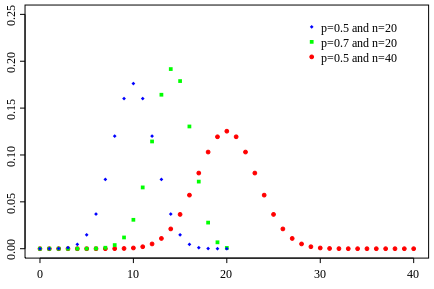

Fuente: https://en.wikipedia.org/wiki/File:Binomial_distribution_pmf.svg

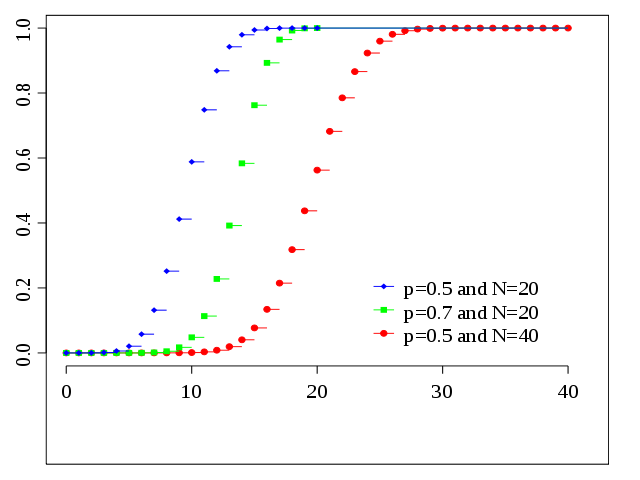

Fuente: https://en.wikipedia.org/wiki/File:Binomial_distribution_cdf.svg

Suponga que queremos generar el valor de $X$, una variable aleatoria binomial $(n,p)$; es decir, $X$ tal que

$$ P\{X=i\}=\frac{n!}{i!(n-i)!}p^i (1-p)^{n-i},  i=0,1,...,n $$ 

Para esto, nos valemos del método de la transformada inversa y de la identidad recursiva

$$ P\{X=i+1\}=\frac{n-i}{i+1} \frac{p}{1-p} P\{X=i\} $$



Si $i$ denota el valor en cuestión, $pr=P\{X=i\}$ la probabilidad de que $X$ sea igual a $i$, y $F=F(i)$ la probabilidad de que $X$ sea menor o igual a $i$, el algoritmo se puede expresar de la siguiente forma: 

> PASO 1: Generar un número aleatorio U.<br>
> PASO 2: $c=p/(1-p),i=0,pr=(1-p)^n,F=pr$.<br>
> PASO 3: Si $U<F$, hacer $X=i$ y terminar.<br>
> PASO 4: $pr=[c(n-i)/(i+1)]pr$, $F=F+pr$, $i=i+1$.<br>
> PASO 5: Ir al paso 3.

In [ ]:
def genbinomial(U,n,p):
  c=p/(1-p)
  i=0
  px=np.power(1-p,n)
  Fx=px

  while True:
    if U < Fx:
      Xi = i
      return Xi
      break
    px=(c*(n-i)/(i+1))*px 
    Fx = Fx + px
    i = i + 1

def genbinomialN(Ui,n,p,N):
  X=[]
  for i in range(0,len(Ui)):
      xi = genbinomial(Ui[i],n,p)
      X.append(xi)
  return X

In [ ]:
N = 100

x0 = 3197.0

n = 14
p = 0.5 


[IIi,XXi,Ui] = genranN(a,b,m,x0,N)
Pi = genbinomialN(Ui,n,p,N)
Ki = np.unique(Pi)
print(Pi)
print(Ki)

In [ ]:
plt.hist(Pi,len(Ki))
#plt.xticks(X)
plt.title('Frecuencia (F)')
plt.show()
F, bin_edges = np.histogram(Pi, bins=len(Ki))
print('F = ' + str(F))

print('k = '+ str(Ki))

In [ ]:
Ps = []

Ki = np.array(Ki)
print(Ki)
for i in range(0,len(Ki)):
  AA = np.math.factorial(n)
  BB = np.power(p,Ki[i])*np.power(1-p,n-Ki[i])
  CC = np.math.factorial(Ki[i])*np.math.factorial(n-Ki[i])
  Ps.append((AA*BB)/CC)

Ps=np.array(Ps)
print(Ps)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(Ki,Ps, width = 0.5)
ax.bar(Ki+.5,F/N, width = 0.5)
ax.set_ylabel('p(X)')
ax.set_xlabel('X')
ax.legend(labels=['Teórica', 'Empirica'])
plt.title('Distribución de probabilidad')
plt.xticks(Ki)